In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from is3.hpss.hpss import HarmonicPercussiveDecomposition

from IPython.display import display, Audio

import librosa

In [2]:
nfft = 2048
sr = 44100
overlap = 0.75

In [3]:
def open_and_plot_audio(url):
  signal, _ = librosa.load(
      url,
      sr=sr,
      mono=True,)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), dpi=150)

  # Plot the audio signal
  ax1.plot(np.arange(len(signal)) / sr, signal)
  ax1.set_title('Audio Signal')
  ax1.set_xlabel('Time (s)')
  ax1.set_ylabel('Amplitude')

  # Calculate the spectrogram
  S = librosa.stft(signal, n_fft=2048, hop_length=512)
  S_dB = librosa.amplitude_to_db(np.abs(S), ref=np.max)

  # Plot the spectrogram
  img = librosa.display.specshow(
      S_dB,
      sr=sr,
      n_fft=2048,
      hop_length=512,
      x_axis='time',
      y_axis='log',
      ax=ax2)
  fig.colorbar(img, ax=ax2, format='%+2.0f dB')
  ax2.set_title('Spectrogram')

  plt.tight_layout()
  plt.show()

  return signal

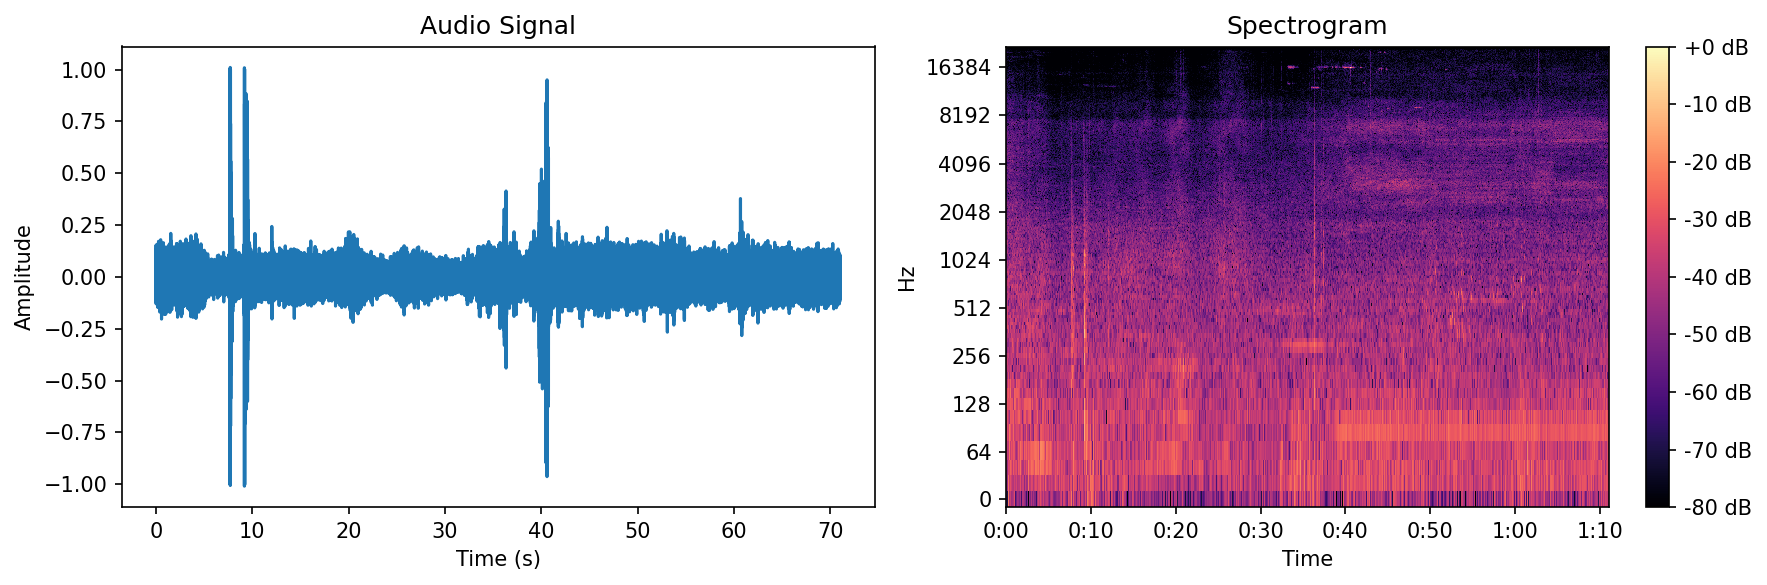

In [4]:
complete_signal = open_and_plot_audio(
    "/home/admin/audible/protected/dev/rendering/studies/004_baseline_perceptual_equalization/004_generate_webMUSHRA_audios/noise_recordings/street-2024_08_08-16_43_54.870.wav")

In [16]:
real_mix = complete_signal[8 * sr:13 * sr]

print("Mix")
display(Audio(real_mix, rate=sr))

Mix


In [18]:
hpss = HarmonicPercussiveDecomposition(
    nfft=nfft,
    window_size=nfft,
    overlap=0.75,
    margin=3.
)

y_p, y_h, S_p, S_h = hpss.forward(real_mix)

In [19]:
print("Impulses")
display(Audio(y_p, rate=sr))

print("Background")
display(Audio(y_h, rate=sr))

Impulses


Background


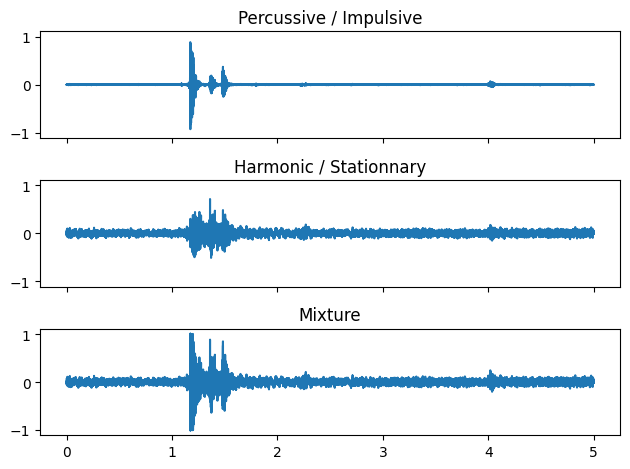

In [20]:
t = np.arange(real_mix.shape[-1]) / sr

fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True)
ax[0].plot(t, y_p.flatten())
ax[0].set_title("Percussive / Impulsive")

ax[1].plot(t, y_h.flatten())
ax[1].set_title("Harmonic / Stationnary")

ax[2].plot(t, y_p.flatten() + y_h.flatten())
ax[2].set_title("Mixture")

plt.tight_layout()